# Emotion and Memory
### Matthew Chong A16156411
### Daneil Byers A15396367
### Steve Kuk A15521681
### Robert Aispuro

# I. Introduction and Background

### IA. Overview

For our project, we wanted to analyze data on an individual's ability to comprehend and recall information and see if their ability to execute these tasks are influenced by either positive or negative sentiment. We decided to split the data between age groups and divided them into 3 buckets: 18-25, 30-40, 45-55 as well as splitting the data between 3 columns: recalled, imagined and retold.  We focused on specific columns of information from the dataset such as age, draining, distracted similarity, etc, that can potentially influence one’s ability to comprehend and recall information. We took an approach using these variables to simultaneously analyze memory recollection as well as sentiment for individuals.

### IB. Research Question

 Does Positive and Negative emotion influence memory when isolated regardless of environment and regardless of gender?



### IC. Background & Prior Work

Over the past few years, students' academic performance has been largely affected by the pandemic where in-person classes transitioned into online classes. Traditionally, a student's learning and education has always been delivered in person. Now, students are abruptly forced to adapt to a new learning environment where their education is being delivered through a monitor screen. This sudden change either had a positive or negative academic impact, depending on the prefered learning method on the individual. In the research article, *Integrating students' Perspective about Online Learning: A hierarchy of factors* by Montgomery Van Wart, Van Wart and his team found that the most critical factor of online classes is the "loss of physical interaction". The loss of physical interaction demanded a higher level of interactivity and instructional sophistication in the virtual aspect. Furthermore, how students personally feel about the sudden shift in learning may have an influence in their ability to comprehend and recall information delivered through their computers. The research article, *Impact of online classes on the satisfaction and performance of students during the pandemic period of COVID-19* by Ram Gopal, looks at this factor. The study evaluated student's thoughts about how they personally felt about online learning. The study found that "overall students agreed that online teaching was valuable for them". From this article, it seems that students are satisfied with online learning. In fact, in another article called *The Influence of Virtual Learning Environments in Students' performance* by Paul Alves, Alves found that the more access a student has to VLE (Virtual Learning Environments), the more this leads to an increase of the number of units they register, an increase in the number of units they pass, and a decrease in the "percentage of students who failed all course units". Thus, not only are students satisfied with online learning, they are also overall performing better in their academics. From these articles, we have a general idea that a student's emotions (positive or negative) do in fact play a role in their academic performance.

From our own group's experience, we have noticed that it has gotten increasingly difficult to direct our attention and retain knowledge given in class. As a result of this, we are motivated in finding the factors that influence attention. We want to uncover if positive,negative or neutral emotions contribute to one's ability to focus, retain memory and perform cognitive tasks. More in-depth, we are interested in measuring the difference of cognitive performance when one's emotion is changed. As a result we believe that it is crucial to find the most productive way to retain academic knowledge so that we can better assist fellow students during these unusual times.

- https://educationaltechnologyjournal.springeropen.com/articles/10.1186/s41239-020-00229-8
- https://link.springer.com/article/10.1007/s10639-021-10523-1
- https://www.semanticscholar.org/paper/The-Influence-of-Virtual-Learning-Environments-in-Alves-Miranda/a7c7ba6194633bd68a300522089c795fb4c83a79

### ID. Hypothesis

If an individual is infected with positive emotion then their ability to comprehend and recall information is enhanced. Likewise, if an individual is infected with negative emotions then their ability to comprehend information is imperiled. Positive emotion is supplemental to learning and memory recollection because we believe positive sentiment influences motivation as well as focus which are two essential factors in memory. Negative emotion is detrimental to learning and memory recollection because having a negative mindset in the context of a learning environment restricts one's ability to recall and comprehend new information.

# II. Data Analysis

### IIA. Set Up

First, we need to import all the packages and data we will need

In [1]:
#Installations required

#python -m spacy download en_core_web_lg
#pip install spacy
#pip install vaderSentiment

In [2]:
#Import packages
from lisc import Counts
from lisc.utils.db import SCDB
from lisc.plts.counts import *
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import spacy

#Data Import
hippDf = pd.read_csv('hippoCorpusV2.csv')
#Suppress shallow copy warnings
pd.options.mode.chained_assignment = None

### IIB. Data Wrangling and Data Cleaning


Next, we will do some data wrangling. We are going to focus on these columns and check for null values:
- annotatorAge: Lower limit of the age bucket of the worker.
  Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54,55+
  
- story: Story about the imagined or recalled event (15-25     sentences)
- distracted: How distracted were you while writing your story? (5-point Likert)

- draining: How taxing/draining was writing for you emotionally? (5-point Likert)

- frequency: How often do you think about or talk about this event? (5-point Likert)

- importance: How impactful, important, or personal is this story/event to you? (5-point Likert)

- logTimeSinceEvent: Log of time (days) since the recalled event happened

- mainEvent: Short phrase describing the main event described

- similarity: How similar to your life does this event/story feel to you? (5-point Likert)

- stressful: How stressful was this writing task? (5-point Likert)

- summary: Summary of the events in the story (1-3 sentences)

- timeSinceEvent: Time (number of days) since the recalled event happened

#### Check for null values
Let's check to see if our dataset has any null values

In [3]:
#Check for null values, if null value found returns True
print('AnnotatorAge null values ... ',hippDf['annotatorAge'].isnull().values.any())
print('Story null values ...        ',hippDf['story'].isnull().values.any())
print('Distracted null values ...   ', hippDf['distracted'].isnull().values.any())
print('Draining null values ...     ', hippDf['draining'].isnull().values.any())
print('Frequency null values ...    ', hippDf['frequency'].isnull().values.any())
print('Importance null values ...   ', hippDf['importance'].isnull().values.any())
print('LTSinceEvent null values ... ', hippDf['logTimeSinceEvent'].isnull().values.any())
print('Similarity null values ...   ', hippDf['similarity'].isnull().values.any())
print('Stressful null values ...    ', hippDf['stressful'].isnull().values.any())
print('TimeSinceEvent null values ..', hippDf['timeSinceEvent'].isnull().values.any())


AnnotatorAge null values ...  True
Story null values ...         False
Distracted null values ...    False
Draining null values ...      False
Frequency null values ...     True
Importance null values ...    True
LTSinceEvent null values ...  False
Similarity null values ...    True
Stressful null values ...     False
TimeSinceEvent null values .. False


As we can see there are some null values which is expected based on the dataset the was provided. Since we are interested in the age of the indivduals and their emotion we are going to drop any row with a NaN value in the AnnotatorAge column and importance column

In [4]:
noNaNHippDf = hippDf.dropna(subset=['annotatorAge','importance',])

In [5]:
noNaNHippDf.shape

(6687, 23)

We want to make sure our dataset is cleaned so there are no more NaN values. Next, let's take a look at the annotatorAge column

In [6]:
noNaNHippDf['annotatorAge'].unique()

array([25., 35., 30., 18., 50., 40., 45., 55.])


From this, we can see that there are 8 unique age variables. For this project, we will classify the age bucket 18 and 25 as **'Youth'**, 30,35,40 as **'Adults'**, and 45,50,55 as **'Seniors'** into a new column called **"AgeGroup"**

In [7]:
#Categorizes annotatorAge into different age groups
def ageGroup(row):
    if row['annotatorAge'] == 18 or row['annotatorAge'] == 25:
        return 'Youth'
    elif row['annotatorAge'] == 30 or row['annotatorAge'] == 35 or row['annotatorAge'] == 40:
        return 'Adult'
    elif row['annotatorAge'] == 45 or row['annotatorAge'] == 50 or row['annotatorAge'] == 55:
        return 'Senior'
    else:
        return None

In [8]:
#apply new column
ageKey = noNaNHippDf.apply(lambda row: ageGroup(row),axis=1)


In [9]:
noNaNHippDf['AgeGroup'] = ageKey


In [10]:
noNaNHippDf['AgeGroup'].unique()

array(['Youth', 'Adult', 'Senior'], dtype=object)

This new column is now set with our unique variables and we can move on to continue wrangling the rest of the data

#### Splitting data by group
Next, we will split the data into 3 groups with the memType column with **"recalled"**,**"imagined"**, and **"retold"** so we can analyze them separately later

In [11]:
recalled_df = noNaNHippDf[noNaNHippDf['memType']=="recalled"]
imagined_df = noNaNHippDf[noNaNHippDf['memType']=="imagined"]
retold_df = noNaNHippDf[noNaNHippDf['memType']=="retold"]


Again, we are going to focus on these columns:
- annotatorAge: Lower limit of the age bucket of the worker.
  Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54,55+
  
- story: Story about the imagined or recalled event (15-25     sentences)
- distracted: How distracted were you while writing your story? (5-point Likert)

- draining: How taxing/draining was writing for you emotionally? (5-point Likert)

- frequency: How often do you think about or talk about this event? (5-point Likert)

- importance: How impactful, important, or personal is this story/event to you? (5-point Likert)

- logTimeSinceEvent: Log of time (days) since the recalled event happened

- mainEvent: Short phrase describing the main event described

- similarity: How similar to your life does this event/story feel to you? (5-point Likert)

- stressful: How stressful was this writing task? (5-point Likert)

- summary: Summary of the events in the story (1-3 sentences)

- timeSinceEvent: Time (number of days) since the recalled event happened

- recAgnPairId: ID of the recalled story that corresponds to this retold story (null for imagined stories). Group on   this variable to get the recalled-retold pairs.

So we are going to create new datasets based on their group with the columns listed above.

In [12]:
newRecalled = recalled_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]
newImagined = imagined_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]
newRetold = retold_df[['annotatorAge','story','distracted','draining','frequency',
                                         'importance','logTimeSinceEvent','mainEvent','similarity',
                                         'stressful','summary','timeSinceEvent','AgeGroup','recAgnPairId','memType']]

#### Performing text comparison
We are going to look at how similar the stories are between recalled and retold using the spacy package for analysis later. Though, first we need to prepare the data through wrangling. As a reminder, the recalled group is recalling a previous story from their life and the retold group is trying to retell the same story they gave previously based on the summary that they created after they told their start in the recalled group. We are going to make a new table that combines the recalled story and the retold story so that we can more easily apply the spacy package to it. 

First, we need to find the unique id's that link the two data sections together

In [13]:
#Creating a list that contains the keys to link the Recalled and Retold group
idTags = noNaNHippDf['recAgnPairId'].unique()
#Need to remove the null tag
indexOfNull = 0
newIdTags = np.delete(idTags,indexOfNull)
newIdTags

array(['304SM51WA4QG34IRAVFYVE1S8XNSBV', '304SM51WA4QG34IRAVFYVE1SAOBSB3',
       '308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ', ...,
       '3ZV9H2YQQET47QVNF7ATAK61QT9W3C', '3ZV9H2YQQET47QVNF7ATAK61TBE3WR',
       '3ZY8KE4ISKPJZ21KN8HT1QGYU5NQVO'], dtype=object)

Now that we have all the unique tags we need to find the recalled data and merge it with the retold data

In [14]:
listOfLists = []
secondKeyStory = []
deltaOfTime = []
for tagNumber in range(len(newIdTags)):
    #Get df of unique tag
    tagIds = hippDf[hippDf['recAgnPairId'] == newIdTags[tagNumber]]
    #Grab the first one and add it to the list
    mainVal = tagIds.iloc[0]
    #Take the story of the second
    secondStory = tagIds['story'].iloc[1]
    #Check that the data works right
    timeSinceRe = tagIds['timeSinceEvent'].iloc[1]
    
    
    #Add them to a list to make a DF out of
    listOfLists.append(mainVal)
    secondKeyStory.append(secondStory)
    deltaOfTime.append(timeSinceRe)
    
    
    

In [15]:
recalledAndRetold = pd.DataFrame(listOfLists)
recalledAndRetold['retold stories'] = secondKeyStory
recalledAndRetold['time since recalled'] = deltaOfTime
recalledAndRetold.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,3.000000e+01
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,304SM51WA4QG34IRAVFYVE1SAOBSB3,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,1.400000e+01
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.000000e+00
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.000000e+00
26,3OJSZ2ATDTISVQHQLIQAX154MTN576,612,3MFQXXSF,30.0,man,white,1.0,1.0,5.0,5.0,...,308XBLVESJQ42PIEV6FT54WWN37BRA,NaN,NaN,NaN,About seven and a half months ago I found out ...,1.0,I found out I am going to be a father. My wif...,240.0,The biggest thing to happen to me is finding o...,6.666667e+29


As we can see in row 26 the data in the time since recalled column makes no sense. After doing further investigation this error orginates from how the data was recorded. So to avoid skewed results we are going to remove any result that is above 1111111 days. We chose this point from looking at the data and seeing that it jumps from 780 days to 
1111111 which is a jump from 2.14 years to 3,044 years.

In [16]:
cleanedRecalledAndRetold = recalledAndRetold[recalledAndRetold['time since recalled'] < 1111111]
cleanedRecalledAndRetold.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,304SM51WA4QG34IRAVFYVE1SAOBSB3,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0
31,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,308XBLVESJQ42PIEV6FT54WWPO4RBV,NaN,NaN,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0



Lets check and make sure that there are no more extraneous data points

In [17]:
cleanedRecalledAndRetold['time since recalled'].unique()

array([ 30.,  14.,   7., 120.,  60.,  90., 150.,  42.,  56.,  35.,  21.,
       360.,  28.,  49., 510., 180., 720., 780., 300., 390., 126., 450.,
       240., 420.,  98.,  63.,  70.,  84., 330., 154., 270., 600., 112.,
        77., 210., 750.])

Now that we no longer have extraneous data points, our data is properly cleaned and wrangled. We are ready to begin our analysis.

### IIC. Data Analysis and Results
- **Sentiment Analysis**
- **Spacy Similarity**

#### Setiment Analysis
Lets run our **Setiment Analysis** first.
This is the method that will be used to calculate the sentiment score which will allow us to compare whether the sentiments are positive or negative.

In [18]:
def sentScore(dataFrame):
    s_score = []
    s_rating = []
    sentiment_obj = SentimentIntensityAnalyzer()
    for i in range(len(dataFrame)):
        s_score.append(sentiment_obj.polarity_scores(dataFrame.iloc[i,1]))
        comp_score = s_score[i]['compound']
        if comp_score > 0.05:
            s_rating.append("Positive")
        elif comp_score <= -0.05:
            s_rating.append("Negative")
        else:
            s_rating.append("Neutral")
    return [s_score, s_rating]

First, we will implement the Sentiment Analysis For Recalled

In [19]:
newRecalled.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType
1,25.0,"The day started perfectly, with a great drive ...",1.0,1.0,3.0,4.0,4.499810,a concert.,NaN,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,recalled
3,30.0,"Five months ago, my niece and nephew were born...",1.0,4.0,3.0,5.0,5.010635,meeting my twin niece and nephew.,NaN,2.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,recalled
5,35.0,Burning Man metamorphoses was perfect. I am de...,1.0,1.0,5.0,5.0,3.401197,about my journey this year to Burning Man meta...,NaN,1.0,It is always a journey for me to go to burning...,30.0,Adult,NaN,recalled
7,18.0,"Dear Diary,I would say this happened about 3 m...",1.0,4.0,5.0,5.0,4.499810,a bad driving experience on the way to Acadia ...,NaN,1.0,What happened is that I was on a trip with my ...,90.0,Youth,NaN,recalled
10,25.0,About a month ago me and my girlfriend went to...,1.0,1.0,2.0,3.0,3.401197,a trip to the zoo.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,recalled


In [20]:
#put into function
recalledSentValues = sentScore(newRecalled)

In [21]:
#assign into new columns
newRecalled['sentiment_score'] = recalledSentValues[0]
newRecalled['sentiment'] = recalledSentValues[1]


Here is the new dataframe with the 2 new Sentimental Analysis columns for Recalled.

In [22]:
newRecalled.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType,sentiment_score,sentiment
1,25.0,"The day started perfectly, with a great drive ...",1.0,1.0,3.0,4.0,4.499810,a concert.,NaN,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,recalled,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",Positive
3,30.0,"Five months ago, my niece and nephew were born...",1.0,4.0,3.0,5.0,5.010635,meeting my twin niece and nephew.,NaN,2.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,recalled,"{'neg': 0.041, 'neu': 0.794, 'pos': 0.165, 'co...",Positive
5,35.0,Burning Man metamorphoses was perfect. I am de...,1.0,1.0,5.0,5.0,3.401197,about my journey this year to Burning Man meta...,NaN,1.0,It is always a journey for me to go to burning...,30.0,Adult,NaN,recalled,"{'neg': 0.053, 'neu': 0.825, 'pos': 0.122, 'co...",Positive
7,18.0,"Dear Diary,I would say this happened about 3 m...",1.0,4.0,5.0,5.0,4.499810,a bad driving experience on the way to Acadia ...,NaN,1.0,What happened is that I was on a trip with my ...,90.0,Youth,NaN,recalled,"{'neg': 0.065, 'neu': 0.856, 'pos': 0.079, 'co...",Positive
10,25.0,About a month ago me and my girlfriend went to...,1.0,1.0,2.0,3.0,3.401197,a trip to the zoo.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,recalled,"{'neg': 0.009, 'neu': 0.883, 'pos': 0.108, 'co...",Positive


Next, we will run the Sentiment Analysis For Imagined

In [23]:
newImagined.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType
0,25.0,"Concerts are my most favorite thing, and my bo...",1.0,1.0,NaN,3.0,4.499810,attending a show,3.0,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,imagined
2,35.0,It seems just like yesterday but today makes f...,1.0,1.0,NaN,4.0,5.010635,my sister having her twins a little early,3.0,1.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,imagined
4,25.0,About a month ago I went to burning man. I was...,2.0,2.0,NaN,3.0,3.401197,the consequences of going to burning man,4.0,4.0,It is always a journey for me to go to burning...,30.0,Youth,NaN,imagined
6,35.0,"Play stupid games, win stupid prizes road trip...",3.0,1.0,NaN,4.0,4.499810,a scary car ride where we swerved on our way t...,1.0,2.0,What happened is that I was on a trip with my ...,90.0,Adult,NaN,imagined
8,25.0,I wanted to write about one of the best days i...,1.0,1.0,NaN,4.0,3.401197,my girlfriend and I going to the zoo.,4.0,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,NaN,imagined


In [24]:
#run function and assign them into dataframe
imaginedSentValues = sentScore(newImagined)
newImagined['sentiment_score'] = imaginedSentValues[0]
newImagined['sentiment'] = imaginedSentValues[1]

#here is the 2 new Sentimental Analysis columns for Imagined
newImagined.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType,sentiment_score,sentiment
0,25.0,"Concerts are my most favorite thing, and my bo...",1.0,1.0,NaN,3.0,4.499810,attending a show,3.0,1.0,My boyfriend and I went to a concert together ...,90.0,Youth,NaN,imagined,"{'neg': 0.011, 'neu': 0.714, 'pos': 0.274, 'co...",Positive
2,35.0,It seems just like yesterday but today makes f...,1.0,1.0,NaN,4.0,5.010635,my sister having her twins a little early,3.0,1.0,My sister gave birth to my twin niece and neph...,150.0,Adult,NaN,imagined,"{'neg': 0.023, 'neu': 0.826, 'pos': 0.151, 'co...",Positive
4,25.0,About a month ago I went to burning man. I was...,2.0,2.0,NaN,3.0,3.401197,the consequences of going to burning man,4.0,4.0,It is always a journey for me to go to burning...,30.0,Youth,NaN,imagined,"{'neg': 0.052, 'neu': 0.872, 'pos': 0.076, 'co...",Positive
6,35.0,"Play stupid games, win stupid prizes road trip...",3.0,1.0,NaN,4.0,4.499810,a scary car ride where we swerved on our way t...,1.0,2.0,What happened is that I was on a trip with my ...,90.0,Adult,NaN,imagined,"{'neg': 0.099, 'neu': 0.828, 'pos': 0.073, 'co...",Negative
8,25.0,I wanted to write about one of the best days i...,1.0,1.0,NaN,4.0,3.401197,my girlfriend and I going to the zoo.,4.0,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,Youth,NaN,imagined,"{'neg': 0.008, 'neu': 0.841, 'pos': 0.151, 'co...",Positive


Finally, we will run the Sentiment Analysis For Retold

In [25]:
newRetold.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType
9,25.0,Me and my girlfriend had gone to the Los Angel...,1.0,1.0,2.0,2.0,5.347108,a trip to the Los Angeles zoo with my girlfriend.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,retold
12,30.0,My Cousin's WeddingWe went to my cousin’s wedd...,3.0,4.0,3.0,3.0,5.192957,my cousin's wedding,NaN,4.0,My life was endangered for doing research on p...,180.0,Adult,304SM51WA4QG34IRAVFYVE1SAOBSB3,retold
18,30.0,I remember the event like it was just yesterda...,4.0,4.0,4.0,4.0,4.094345,my friend's arrest,NaN,3.0,There was an arrest. I bailed out my friend. I...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,retold
21,30.0,"When my now four year old son was born, we wer...",1.0,1.0,4.0,4.0,4.094345,my son's foot surgery,NaN,1.0,My four year old son needed foot surgery. My h...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,retold
26,30.0,About seven and a half months ago I found out ...,1.0,1.0,5.0,5.0,5.480639,Finding out I am going to be a father.,NaN,1.0,I found out I am going to be a father. My wif...,240.0,Adult,308XBLVESJQ42PIEV6FT54WWN37BRA,retold


In [26]:
#Apply function and assign columns into dataframe
retoldSentValues = sentScore(newRetold)
newRetold['sentiment_score'] = retoldSentValues[0]
newRetold['sentiment'] = retoldSentValues[1]

#Here is the 2 new Sentimental Analysis columns for Retold
newRetold.head()

,annotatorAge,story,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,similarity,stressful,summary,timeSinceEvent,AgeGroup,recAgnPairId,memType,sentiment_score,sentiment
9,25.0,Me and my girlfriend had gone to the Los Angel...,1.0,1.0,2.0,2.0,5.347108,a trip to the Los Angeles zoo with my girlfriend.,NaN,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,Youth,304SM51WA4QG34IRAVFYVE1S8XNSBV,retold,"{'neg': 0.033, 'neu': 0.923, 'pos': 0.044, 'co...",Positive
12,30.0,My Cousin's WeddingWe went to my cousin’s wedd...,3.0,4.0,3.0,3.0,5.192957,my cousin's wedding,NaN,4.0,My life was endangered for doing research on p...,180.0,Adult,304SM51WA4QG34IRAVFYVE1SAOBSB3,retold,"{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'co...",Positive
18,30.0,I remember the event like it was just yesterda...,4.0,4.0,4.0,4.0,4.094345,my friend's arrest,NaN,3.0,There was an arrest. I bailed out my friend. I...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060F6NK9IJ,retold,"{'neg': 0.063, 'neu': 0.702, 'pos': 0.234, 'co...",Positive
21,30.0,"When my now four year old son was born, we wer...",1.0,1.0,4.0,4.0,4.094345,my son's foot surgery,NaN,1.0,My four year old son needed foot surgery. My h...,60.0,Adult,308Q0PEVB9Z8LX0Y7Z7O060FETEI96,retold,"{'neg': 0.05, 'neu': 0.873, 'pos': 0.077, 'com...",Positive
26,30.0,About seven and a half months ago I found out ...,1.0,1.0,5.0,5.0,5.480639,Finding out I am going to be a father.,NaN,1.0,I found out I am going to be a father. My wif...,240.0,Adult,308XBLVESJQ42PIEV6FT54WWN37BRA,retold,"{'neg': 0.009, 'neu': 0.88, 'pos': 0.112, 'com...",Positive


#### Spacy Similarity
Now that we have finished the sentimental analysis, we will run the **Spacy similarity** analysis. We are going to use their english large package for vectorization because all the stories that were told differed drastically. By using the large package we will be able to better vectorize our data with cosin similarity. Additionaly the retold group retells their story that they gave during their time in the recalled group given a summary that they created at the end of their recalled story. So we are going to make a new dataset that only focus on the subjects that were in the **recalled** and **retold** groups. This will allow for us to observe a change, if any, in their story telling over a random time period

In [27]:
#load spacy's en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [28]:
#run nlp function from earlier
test1 = cleanedRecalledAndRetold['story'].iloc[0]
test2 = cleanedRecalledAndRetold['retold stories'].iloc[0]
doc1 = nlp(test1)
doc2 = nlp(test2)


By running the nlp function, we can see the similarity between doc1 and doc2

In [29]:
print(doc1.similarity(doc2))

0.9935621914876923


Next, we will create a function that compares the similarity between the recalled story and the retold story called **applyingSpacy**

In [30]:
def applyingSpacy(df):
    sim_score = []
    
    for i in range(len(df)):
        ogStory = df['story'].iloc[i]
        newStory = df['retold stories'].iloc[i]
        nlpComp1 = nlp(ogStory)
        nlpComp2 = nlp(newStory)
        sim_score.append(nlpComp1.similarity(nlpComp2))
        
    return sim_score

In [31]:
#Apply the function, this will take a minute to run
sim_scores = applyingSpacy(cleanedRecalledAndRetold)

Lets double check that all the stories were processed

In [32]:
print(cleanedRecalledAndRetold.shape)
print(len(sim_scores))

(1095, 25)
1095


Since all the stories were processed lets add it back into the dataframe

In [33]:
cleanedRecalledAndRetold['spacy_sim'] = sim_scores
cleanedRecalledAndRetold.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled,spacy_sim
9,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0,0.993562
12,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,NaN,NaN,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0,0.971579
18,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0,0.983846
21,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,NaN,NaN,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0,0.994450
31,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,NaN,NaN,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0,0.993332


Lets read the age group to the dataframe so when we visualize we can see the differences in the age groups

In [34]:
ageKey = cleanedRecalledAndRetold.apply(lambda row: ageGroup(row),axis=1)


In [35]:
cleanedRecalledAndRetold['AgeGroup'] = ageKey

Lets plot our results from Spacy and see what we get


<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

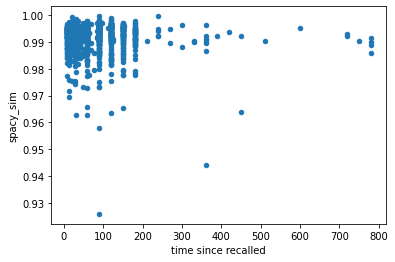

In [36]:
cleanedRecalledAndRetold.plot.scatter(x='time since recalled', y = 'spacy_sim')

These results seem to be fairly high so lets dive deeper in to why that might be
- Spacy documentation states that when taking the similarity of a document it defaults to the average of the token vectors. An example they state is, “fast food” is the average of the vectors for “fast” and “food”, which isn’t necessarily representative of the phrase “fast food”"
- Therefore it could be that the words are similar but the idea is not


### Further Analysis
Let's dig a little deeper to try and see why these high overly high scores may be occuring. The first thing that comes to mind is if the stories are different lengths.
We will create an example and see what the results are when the sentences are:
- completely identical 
- identical but one has an extra sentence related to the previous 
- identical but one has an extra sentence not related to the previous 
- identical but with one having an extra sentence that is told in a different way

In [37]:
#Exact same sentences
doc1 = nlp("I like burgers and dogs.")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. <-> I like burgers and dogs. 1.0


In [38]:
#Compared to raw sentence comparison
numberOfSimilarWords = 5
totalWords = 5
print("Raw comparison", numberOfSimilarWords / totalWords)

Raw comparison 1.0


In [39]:
#Same setences but one has an extra sentence that does relate to the previous
doc1 = nlp("I like burgers and dogs. I also like pineapples")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. I also like pineapples <-> I like burgers and dogs. 0.9651856966280024


In [40]:
#Compared to raw sentence comparison
numberOfSimilarWords = 5
totalWords = 9
print("Raw comparison", numberOfSimilarWords / totalWords)

Raw comparison 0.5555555555555556


In [41]:
#Same setences but one has an extra sentence that does not relate to the previous
doc1 = nlp("I like burgers and dogs. Bob flies planes")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. Bob flies planes <-> I like burgers and dogs. 0.9264174801721186


In [42]:
#Compared to raw sentence comparison
numberOfSimilarWords = 5
totalWords = 8
print("Raw comparison", numberOfSimilarWords / totalWords)

Raw comparison 0.625


We can see that sentences that are irrelevant decrease the score, and sentences that are similar decrease the score but not as much as an irrelevant extra sentence.
But what about an extra sentence that basically says the same thing as the previous but in a different way?

In [43]:
#Same setences but one has an extra sentence that repeats what is said but in a different way
doc1 = nlp("I like burgers and dogs. Burgers and dogs are what I like")
doc2 = nlp('I like burgers and dogs.')
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like burgers and dogs. Burgers and dogs are what I like <-> I like burgers and dogs. 0.9885781045722685


As we can see in the last sentence the similarity is the highest. With these examples we can more reasonably conclude that our results are in fact accurate for what we are trying to do. This is because we want to focus on how much the stories change, not necessarily if the stories are talking about the same thing. Something that could be interesting for the future is to look into how much the length of an overall document can affect these scores. But for the sake of this project we are going to assume that the results are accurate

Bringing together the analysis from the Spacy package, let's compare the similarity score to the change in sentiment score. To do this, we are going to take the sentiment score from the recalled group and subtract it from the retold group by individual

In [44]:
combinedAnalysis = cleanedRecalledAndRetold
combinedAnalysis["sentChange"] = np.nan
combinedAnalysis = combinedAnalysis.reset_index(drop=True)

In [45]:
cRRKeys = cleanedRecalledAndRetold.recAgnPairId.unique()


Removing these keys as the recAgnPairId does not exist in the newRecalled or the newRetold dataframe

In [46]:
cRRKeys = np.delete(cRRKeys,95)
cRRKeys = np.delete(cRRKeys,611)
cRRKeys = np.delete(cRRKeys,797)
cRRKeys = np.delete(cRRKeys,881)
cRRKeys = np.delete(cRRKeys,939)
cRRKeys = np.delete(cRRKeys,1032)
cRRKeys = np.delete(cRRKeys,1068)

In [47]:
numberToPullVal = 0
i=0
#Loop through all the keys
for tagNumber in range(len(cRRKeys)):
    #print(i)
    #i +=1
    #Grab the row corresponding to the key
    recalledRow = newRecalled[newRecalled['recAgnPairId'] == cRRKeys[tagNumber]]
    retoldRow = newRetold[newRetold['recAgnPairId'] == cRRKeys[tagNumber]]

    #Pull the neg, neu, and pos from the column. Stored as a series and not a dict
    #Putting it into a list then pulling from it
    negArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['neg'].tolist()
    neuArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['neu'].tolist()
    posArrReC = pd.DataFrame(recalledRow['sentiment_score'].tolist())['pos'].tolist()

    negArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['neg'].tolist()
    neuArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['neu'].tolist()
    posArrReT = pd.DataFrame(retoldRow['sentiment_score'].tolist())['pos'].tolist()

    #Check the difference between values
    newNegVal = negArrReT[numberToPullVal] - negArrReC[numberToPullVal] 
    newPoVal  = posArrReT[numberToPullVal] - posArrReC[numberToPullVal] 

    #Create a new column based on the difference
    if(newPoVal > newNegVal):
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Pos'
    elif(newPoVal < newNegVal):
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Neg'
    else:
        combinedAnalysis.loc[combinedAnalysis.recAgnPairId == cRRKeys[tagNumber], 'sentChange'] = 'Neu'

In [48]:
combinedAnalysis.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarityReason,story,stressful,summary,timeSinceEvent,retold stories,time since recalled,spacy_sim,AgeGroup,sentChange
0,3YGXWBAF713GBO8MYUFB8VR53RKC4M,7228,4MFUAYFX,25.0,man,hisp,1.0,1.0,2.0,2.0,...,NaN,Me and my girlfriend had gone to the Los Angel...,1.0,Me and my girlfriend went to the zoo on a hot ...,210.0,About a month ago me and my girlfriend went to...,30.0,0.993562,Youth,Neg
1,35LDD5557BQEYC9GWBW5I8LCG5AKMA,4925,HE3SATVD,30.0,man,black,3.0,4.0,3.0,3.0,...,NaN,My Cousin's WeddingWe went to my cousin’s wedd...,4.0,My life was endangered for doing research on p...,180.0,It happen 2 weeks ago at the library. Stared o...,14.0,0.971579,Adult,Neg
2,3NAPMVF0ZX10WTY33ZOCZU2SUYL72I,6488,AXJ0SHSA,30.0,man,white,4.0,4.0,4.0,4.0,...,NaN,I remember the event like it was just yesterda...,3.0,There was an arrest. I bailed out my friend. I...,60.0,About a week ago a received a phone call from ...,7.0,0.983846,Adult,Pos
3,3C8HJ7UOP8G9N782WCZF5N9PKNHZMN,1405,2WT572QN,30.0,woman,hisp,1.0,1.0,4.0,4.0,...,NaN,"When my now four year old son was born, we wer...",1.0,My four year old son needed foot surgery. My h...,60.0,A memorable event that I have recently had hap...,7.0,0.994450,Adult,Neg
4,324G5B4FB4UT0JVPOCKYG69D7A807S,1834,AKT7XTAI,45.0,man,black,2.0,2.0,5.0,5.0,...,NaN,"I fell down a flight of stairs in my home, in ...",2.0,I fell down the stairs in my home and suffered...,240.0,"Last May, I had just come upstairs to get rea...",120.0,0.993332,Senior,Pos


In [49]:
combinedAnalysis.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'retold stories', 'time since recalled', 'spacy_sim',
       'AgeGroup', 'sentChange'],
      dtype='object')

In [50]:
#split the combined analysis dataset into youth, adult, and seniors only
youthOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Youth']
adultOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Adult']
seniorOnly = combinedAnalysis[combinedAnalysis['AgeGroup'] == 'Senior']


### IID. Data Visualizations for Sentimental Analysis

Next, we will look at visualizations for Recalled, Imagined and Retold by Sentiment and Age. In this section, we want to visualize the sentiment of each age group for Recalled, Imagined and Retold. The x-axis is the age while the y-axis is the percentage in their respective sentiment. Below each Bar Graph are the stats displaying each Age Group along with their exact percentage of positive and negative sentiment.

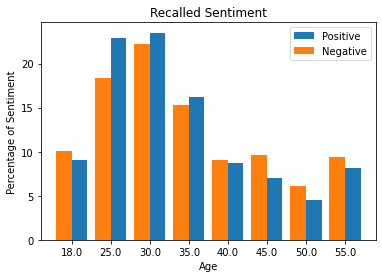

---------- Positive Stats ----------
Age: 18.0 Percentage: 9.019426456984274
Age: 25.0 Percentage: 22.849213691026826
Age: 30.0 Percentage: 23.496762257169287
Age: 35.0 Percentage: 16.23496762257169
Age: 40.0 Percentage: 8.741905642923218
Age: 45.0 Percentage: 7.030527289546716
Age: 50.0 Percentage: 4.4865864939870495
Age: 55.0 Percentage: 8.140610545790935
---------- Negative Stats ----------
Age: 18.0 Percentage: 10.084033613445378
Age: 25.0 Percentage: 18.319327731092436
Age: 30.0 Percentage: 22.18487394957983
Age: 35.0 Percentage: 15.294117647058824
Age: 40.0 Percentage: 9.07563025210084
Age: 45.0 Percentage: 9.57983193277311
Age: 50.0 Percentage: 6.050420168067227
Age: 55.0 Percentage: 9.411764705882353


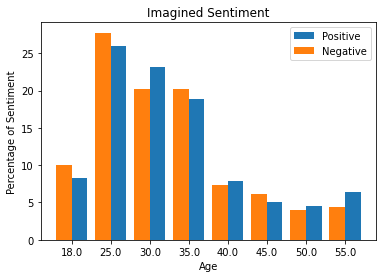

---------- Positive Stats ----------
Age: 18.0 Percentage: 8.32934418382001
Age: 25.0 Percentage: 25.94542843465773
Age: 30.0 Percentage: 23.12111057922451
Age: 35.0 Percentage: 18.81282910483485
Age: 40.0 Percentage: 7.850646242221158
Age: 45.0 Percentage: 5.026328386787937
Age: 50.0 Percentage: 4.547630445189086
Age: 55.0 Percentage: 6.366682623264721
---------- Negative Stats ----------
Age: 18.0 Percentage: 10.039370078740157
Age: 25.0 Percentage: 27.755905511811026
Age: 30.0 Percentage: 20.275590551181104
Age: 35.0 Percentage: 20.275590551181104
Age: 40.0 Percentage: 7.283464566929133
Age: 45.0 Percentage: 6.102362204724409
Age: 50.0 Percentage: 3.937007874015748
Age: 55.0 Percentage: 4.330708661417323


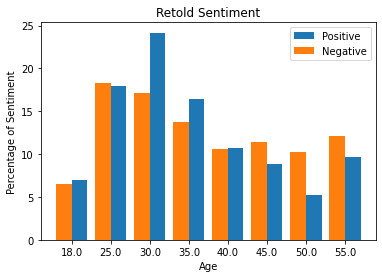

---------- Positive Stats ----------
Age: 18.0 Percentage: 6.999041227229147
Age: 25.0 Percentage: 17.929050814956852
Age: 30.0 Percentage: 24.161073825503358
Age: 35.0 Percentage: 16.39501438159156
Age: 40.0 Percentage: 10.738255033557047
Age: 45.0 Percentage: 8.820709491850431
Age: 50.0 Percentage: 5.273250239693192
Age: 55.0 Percentage: 9.683604985618409
---------- Negative Stats ----------
Age: 18.0 Percentage: 6.4638783269961975
Age: 25.0 Percentage: 18.250950570342205
Age: 30.0 Percentage: 17.110266159695815
Age: 35.0 Percentage: 13.688212927756654
Age: 40.0 Percentage: 10.646387832699618
Age: 45.0 Percentage: 11.406844106463879
Age: 50.0 Percentage: 10.26615969581749
Age: 55.0 Percentage: 12.167300380228136


In [51]:
#Recalled Visualization

# Create x-axis based on unique age values in the Data
X = newRecalled['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newRecalled['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newRecalled[(newRecalled['annotatorAge'] == x) & (newRecalled['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newRecalled[(newRecalled['annotatorAge'] == x) & (newRecalled['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Recalled Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

#Imagined Visualization


# Create x-axis based on unique age values in the Data
X = newImagined['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newImagined['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newImagined[(newImagined['annotatorAge'] == x) & (newImagined['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newImagined[(newImagined['annotatorAge'] == x) & (newImagined['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Imagined Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

#Retold Visualization   


# Create x-axis based on unique age values in the Data
X = newRetold['annotatorAge'].unique()
X.sort()
x_axis = np.arange(len(newRetold['annotatorAge'].unique()))


# Calculate Positive Amount and Percentages
positive = []
positive_total = 0
for x in X:
    value = len(newRetold[(newRetold['annotatorAge'] == x) & (newRetold['sentiment'] == 'Positive')])
    positive.append(value)
    positive_total+=value

positive_percentage = []
for x in positive:
    positive_percentage.append((x/positive_total) * 100)


# Calculate Negative Amount and Percentages
negative = []
negative_total = 0
for x in X:
    value = len(newRetold[(newRetold['annotatorAge'] == x) & (newRetold['sentiment'] == 'Negative')])
    negative.append(value)
    negative_total+=value

negative_percentage = []
for x in negative:
    negative_percentage.append((x/negative_total) * 100)

plt.xticks(x_axis, X)
plt.bar(x_axis + 0.2 ,positive_percentage,0.4,label='Positive')
plt.bar(x_axis - 0.2 ,negative_percentage,0.4,label='Negative')
plt.ylabel('Percentage of Sentiment')
plt.xlabel('Age')
plt.title('Retold Sentiment')
plt.legend()
plt.show()

positive_stats = {}
negative_stats = {}
index = 0
for val in X:
    positive_stats[val] = positive_percentage[index]
    negative_stats[val] = negative_percentage[index]
    index+=1
print('---------- Positive Stats ----------')
for i in positive_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(positive_stats[i]))

print('---------- Negative Stats ----------')
for i in negative_stats:
    print("Age: {}".format(i) + " Percentage: {}".format(negative_stats[i]))

The previous graph showed us the relationships between Positve and Negative Sentiments by **Age**. We can see that the results between Sentiments by Age are pretty spread out and that there is no clear relationship between the 3 graphs. Though, if we look at each graph individually, we can see some trends throughout the different years. For example, for Recalled, there is a period of increased positivity between the ages 25 to 35. We can also see that for the Recalled and Retold graphs, between the ages of 45-55, there is mostly a negative sentiment within the groups. 

Text(0.5, 1.0, 'Retold Sentiment')

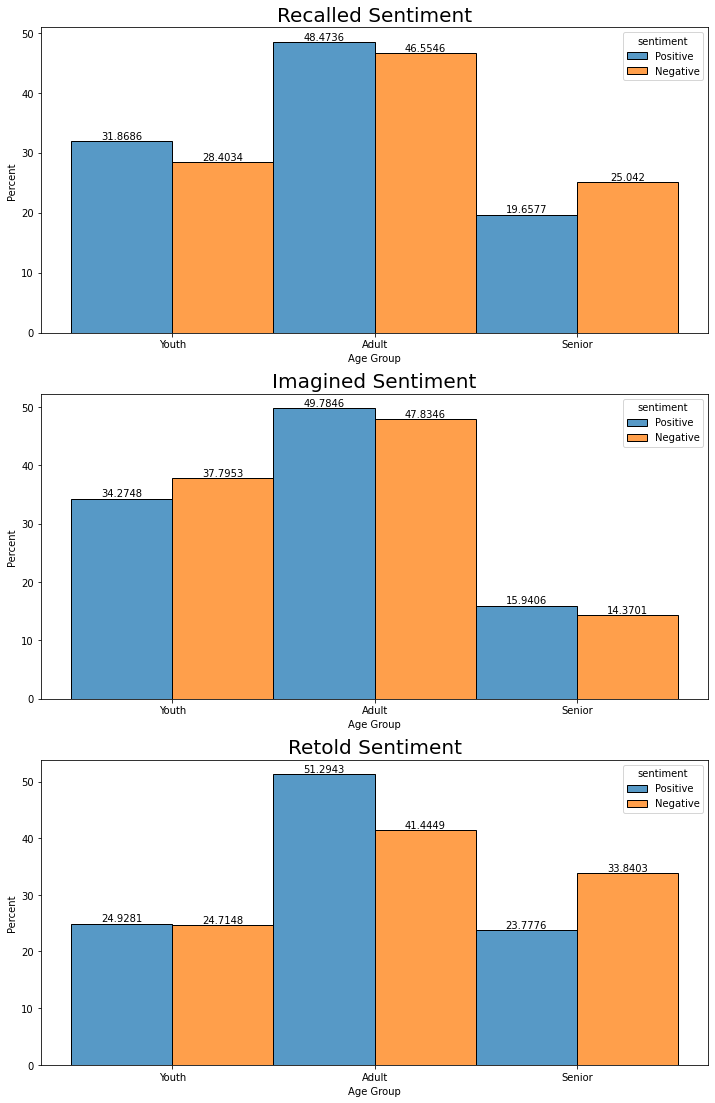

In [52]:
#Plot settings
fig, axes = plt.subplots(3, 1,figsize=(10,15))
fig.tight_layout(h_pad = 4.0)

#Recalled Visualization
graph_2 = sns.histplot(data = newRecalled, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[0])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[0].set_title('Recalled Sentiment', fontsize=20)

#Imagined Visualization
graph_2 = sns.histplot(data = newImagined, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[1])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[1].set_title('Imagined Sentiment', fontsize=20)

#Retold Visualization
graph_2 = sns.histplot(data = newRetold, x="AgeGroup", hue = 'sentiment', hue_order = ['Positive','Negative'],multiple='dodge', stat = 'percent',common_norm=False,ax=axes[2])
for container in graph_2.containers:
    graph_2.bar_label(container)

graph_2.set(xlabel = 'Age Group')
axes[2].set_title('Retold Sentiment', fontsize=20)

Comparing these graphs, the strongest relationship that stood out is how the Adult AgeGroup column seems to have a more Positive Sentiment than Negative relationship in all 3 Retold, Recalled, and Imagined Sentiments. Maybe this has something to do with the adult stage in life where people tend to be happier? Next, let's visualize the Sentimental Analysis between Retold vs. Recalled Stories

Next, let's visualize the Sentimental Analysis between **Retold vs. Recalled Stories**

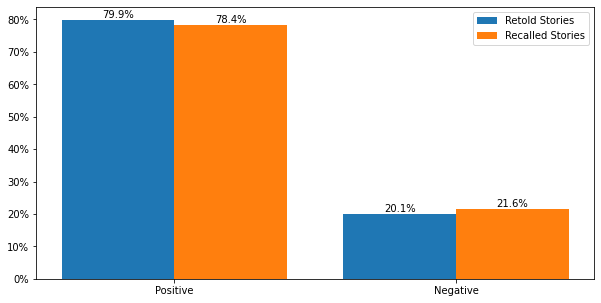

In [53]:
#select positive and negative sentiments (remove neutral sentiment)
posnegRetold = newRetold[(newRetold['sentiment'] == 'Positive') | (newRetold['sentiment'] == 'Negative')]
posnegRecalled = newRecalled[(newRecalled['sentiment'] == 'Positive') | (newRecalled['sentiment'] == 'Negative')]

#plot parameters
x = posnegRetold['sentiment']
y = posnegRecalled['sentiment']
fig, ax = plt.subplots(figsize=(10,5))
values, bins, patches = plt.hist([x, y], bins=np.arange(3)-0.5, label=['Retold Stories', 'Recalled Stories'],density=True)
 
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
for container in ax.containers:
    labels = [f'{x:.1%}' for x in container.datavalues]
    ax.bar_label(container, labels=labels)
plt.show()

From this graph, we can see that when comparing Positive and Negative sentiments between Retold and Recalled stories, there are more Positive Retold stories than Recalled stories. Also, there are more Negative stories in Recalled than Retold.

Finally, for consistency, we will add the plots that we've seen and analyzed from the Spacy Similarity analysis.

<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

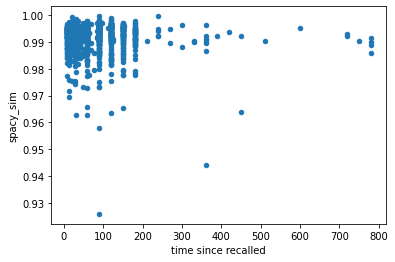

In [54]:
cleanedRecalledAndRetold.plot.scatter(x='time since recalled', y = 'spacy_sim')

As we can see from the scatter plot, most of the particpants had higher similarity scores with a couple outliers. Additionally we can see that the time since recall does not have as much of an effect as initially anticpated.

Let's shrink our data point range a little bit and see if it shows us anything else.

<AxesSubplot:xlabel='time since recalled', ylabel='spacy_sim'>

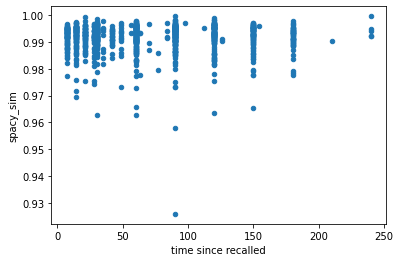

In [55]:
test = cleanedRecalledAndRetold[cleanedRecalledAndRetold['time since recalled'] < 250]
test.plot.scatter(x='time since recalled', y = 'spacy_sim')

There isn't a lot to see from this plot other then stories appear to generally have set interval days in which participants were asked to retell their previous story.

Let's see if we can find any interesting groupings based on age group.

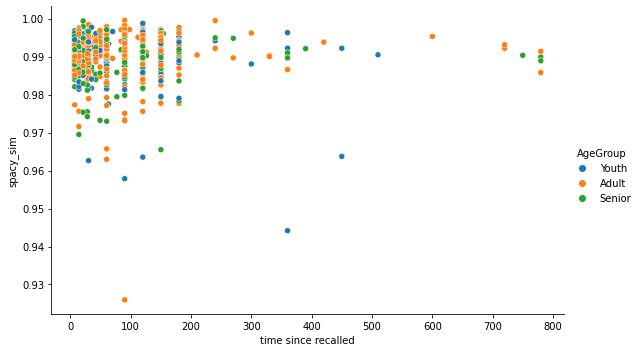

In [56]:
_ages = ['Youth','Adult','Senior']
sns.relplot(data=combinedAnalysis, x='time since recalled', y='spacy_sim', hue='AgeGroup', hue_order=_ages, aspect=1.61)
plt.show()

It appears that the Youth group were not asked to retell anything past 510 days and Adult and Senior groups had the longest time since they had recalled the event. 

# III. Conclusion and Discussion

As stated above we want to see how emotion affects memory so let's look into the results we got. First lets see if the emotion of our age group has increased or decreased over time.

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

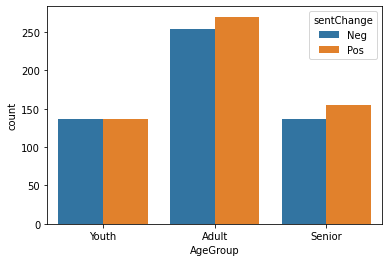

In [57]:
sns.countplot(x='AgeGroup',hue='sentChange',data=combinedAnalysis)

As we can see, the emotion change was actually more positive over time in the Adult and Senior age group. As for the youth group the negative and positive emotion is about the same.

Let's take a look at the spacy distribution classified by age group

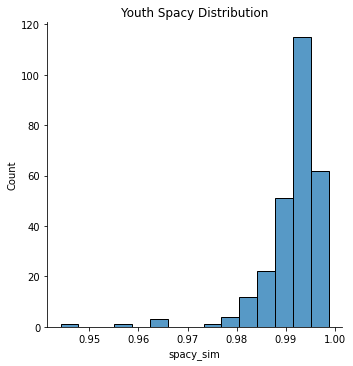

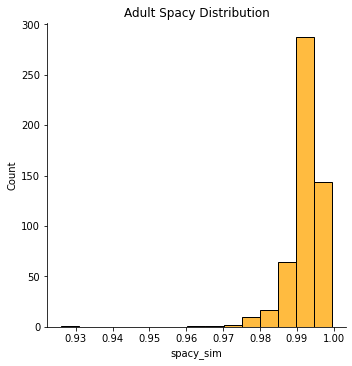

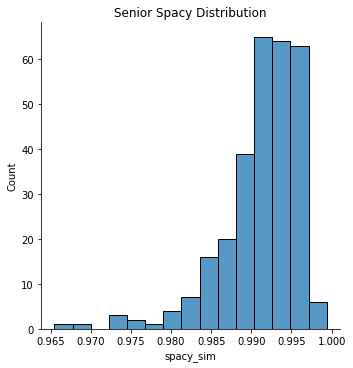

In [58]:
youth = sns.displot(youthOnly, x='spacy_sim',bins=15)
youth.set(title='Youth Spacy Distribution')
adult = sns.displot(adultOnly, x='spacy_sim',bins=15,color='orange')
adult.set(title='Adult Spacy Distribution')
senior = sns.displot(seniorOnly, x='spacy_sim',bins=15)
senior.set(title='Senior Spacy Distribution')

Next, looking at the distributions, the Adult distribution appears to show the overall best retelling of the previous story, then the Youth distribution, and finally the Senior distribution. This shows us that even if there is better emotion, it does not necessarily lead to better memory. If emotion were to help memory we would see the Senior distribution being the best followed by Adult and then finally Youth.

Let's look at the emotion variables that might be driving this increase. We decided that the variables that speak the most about emotion are:
- Draining which describes how emotionally drained the individual was when telling the story
- Importance which describes how driven the individual was when telling the story
- Stressful which describes how stressed the individual was when telling the story

In [59]:
newRecalled.groupby('AgeGroup').mean().drop(columns=['annotatorAge','frequency','logTimeSinceEvent',
                                                   'similarity','timeSinceEvent','distracted'])

,draining,importance,stressful
AgeGroup,,,
Adult,2.337594,4.480451,2.339850
Senior,2.506897,4.653448,2.475862
Youth,2.303488,4.472093,2.293023


In [60]:
newRetold.groupby('AgeGroup').mean().drop(columns=['annotatorAge','frequency','logTimeSinceEvent',
                                                   'similarity','timeSinceEvent','distracted'])

,draining,importance,stressful
AgeGroup,,,
Adult,2.126739,4.268934,2.128284
Senior,2.285294,4.491176,2.200000
Youth,1.975460,4.168712,2.015337


These three emotional variables are done on a Likert scale meaning 5 being the most stress, 3 being a neutral amount of stress and 1 being no stress at all. Between the two plots, we can see that individuals on average were less emotionally drained during the retelling of the story as opposed to recalling it. The average importance level was higher for each age group during the recalling of the story versus the retelling of the story where they were lower. Finally, the stress decreased for each age group when they were retelling the story as opposed to recalling it. 


We can also look at violin plots to help us better see the distribution of the emotions by age group

[Text(0.5, 1.0, 'Recalled Stress Distribution')]

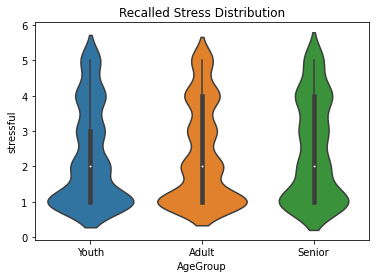

In [61]:
stressRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='stressful')
stressRec.set(title='Recalled Stress Distribution')

[Text(0.5, 1.0, 'Retold Stress Distribution')]

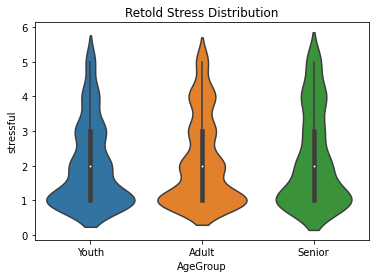

In [62]:
stressRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='stressful')
stressRet.set(title='Retold Stress Distribution')

We can see that the stress distribution thinned out at 6 and increase from 2 - 3 across all three groups meaning that all groups felt less stressed when retelling their story

[Text(0.5, 1.0, 'Recalled Importance Distribution')]

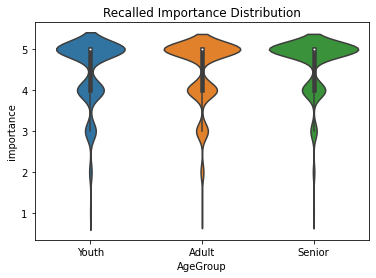

In [63]:
importanceRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='importance')
importanceRec.set(title='Recalled Importance Distribution')

[Text(0.5, 1.0, 'Retold Importance Distribution')]

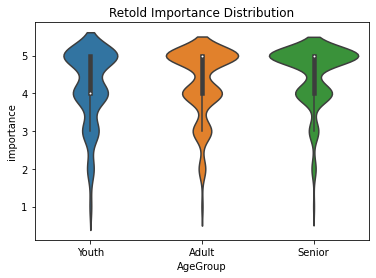

In [64]:
importanceRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='importance')
importanceRet.set(title='Retold Importance Distribution')

We can see the importance distribution filled in the thinner spots and grew more from 4 to 2 meaning the story became less important to them.

[Text(0.5, 1.0, 'Recalled Draining Distribution')]

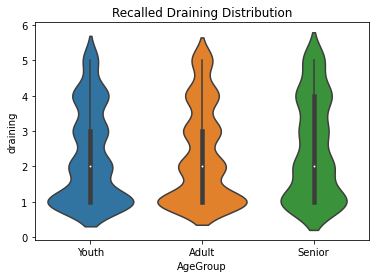

In [65]:
drainingRec = sns.violinplot(x='AgeGroup',data=newRecalled,
            y='draining')
drainingRec.set(title='Recalled Draining Distribution')

[Text(0.5, 1.0, 'Retold Draining Distribution')]

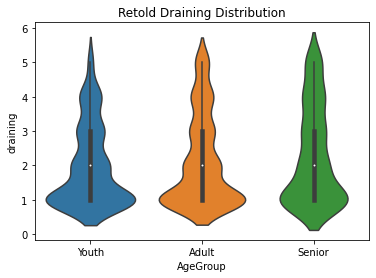

In [66]:
drainingRet = sns.violinplot(x='AgeGroup',data=newRetold,
            y='draining')
drainingRet.set(title='Retold Draining Distribution')

We can see that draining followed a similar pattern as stressed did, again showing that all three groups felt less draining during the retelling of their story

### Overall
We are unable to conclusively say that emotion drives better memory from this dataset and the data points that we used. This does not mean that emotion for certain does not drive memory for a variety of reasons. The first is, emotion is something subjective so how one person feels does not always line up with how someone else might feel. Additionally, there are a lot more emotions that weren't recorded that could be affecting individuals during their recalling that might have not been there during their retelling. Moreover, our hypothesis was tested on one dataset using two different packages. There are a variety of other approaches that could be done with different packages as well as different datasets. One thing that our dataset did challenge was a general idea that 0- 30 year-olds are generally more positive, individuals in their 30 - 50s are more negative, and individuals 50+ are more positive. Our dataset showed that based on their initial emotions Seniors became more positive, then Adults, and then finally Youth being at a net-zero.

Something that our group discussed but did not have enough time to do was an unsupervised machine learning approach. More specifically a k-means clustering. Ideally, if we had more time we could have clustered the stories individually and measured the differences between the centroids of the two different stories. However, this would take a lot of work as we would need to come up with our own vectorization, test it, and then implement a k-means clustering algorithm and test that as well. 

 Also, we did not look into the imagined group for our project as we felt that retelling an imagined story is not as impactful as retelling a story that actually happened. We also thought that telling an imaged story would skew the emotional variables as they would tend to be happy and less stressed. This is because humans generally dream about happier things opposed to negative things. With all that being said, this was just our assumption and the data in this dataset could prove to show us otherwise.

Other experiments that would be interesting would be tracking the positivity and negativity of an individual over a long period of time. In other words, tracking a user who has been on Twitter for 20+ years and scrapping every tweet they made. From there see if the user becomes more negative or positive over time. Something else that would be interesting to do at UCSD would be to observe student CAPEs responses over time and especially look at the response pre, during, and post COVID. This approach would be a little more difficult to do as we believe that there would be a sense of depression because of an online-only environment. This would mean we would have to take into account positive, negative, and depressed responses. Again, emotion is very subject such as what is depressed and what is negative. Nonetheless, it could provide results that the school could use to help aid students before they get to those points by using variables that allow them to predict which students need help before it is too late.